<a href="https://colab.research.google.com/github/udoyroy98/Motor_Fault_Detection_ML/blob/main/GB_fold_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as snNew
import pandas as pdNew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as pltNew

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/0-5train.csv')

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,9]

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()


In [ ]:


# Use cross-validation to find the optimal number of boosting stages (n_estimators)
# This helps prevent overfitting by stopping the training when performance plateaus
n_estimators_range = [100, 500, 1000, 2000]
cv_scores = []
for n_estimators in n_estimators_range:
    gb_classifier.n_estimators = n_estimators
    scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_n_estimators = n_estimators_range[np.argmax(cv_scores)]
print("Best n_estimators:", best_n_estimators)



In [ ]:
# Set the optimal n_estimators and fit the model
gb_classifier.n_estimators = best_n_estimators
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1_score =  f1_score(y_test, y_pred, average='macro')


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.9945
Recall: 0.9945
Precision: 0.9945
F1-Score: 0.9945


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25035
           1       0.99      0.99      0.99     25074
           2       0.99      0.99      0.99     24894

    accuracy                           0.99     75003
   macro avg       0.99      0.99      0.99     75003
weighted avg       0.99      0.99      0.99     75003



In [ ]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[25031,     0,     4],
       [    1, 24870,   203],
       [    1,   205, 24688]])

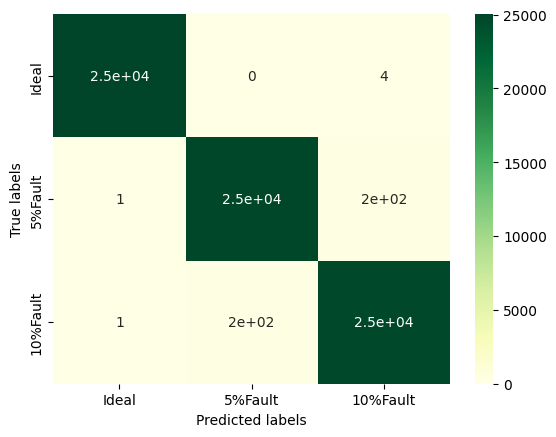

In [ ]:
ax= plt.subplot()
confusion_matrix = pdNew.DataFrame(c_mat, range(3), range(3))
snNew.heatmap(confusion_matrix, annot=True ,cmap="YlGn", ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.xaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']); ax.yaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']);
pltNew.show()

In [ ]:
from sklearn.metrics import roc_curve,auc
pred_prob = gb_classifier.predict_proba(X_test)
pred_prob.shape

(75003, 3)

In [ ]:
from sklearn.preprocessing import label_binarize
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test,classes = np.unique(y_test))

In [ ]:
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()
n_class = classes.shape[0]
for i in range(n_class):
  fpr[i],tpr[i],thresh[i] = roc_curve(y_test_binarized[:,i],pred_prob[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Print micro-average ROC AUC
print("Micro-average ROC AUC: {:.4f}".format(roc_auc["micro"]))

Micro-average ROC AUC: 0.9998


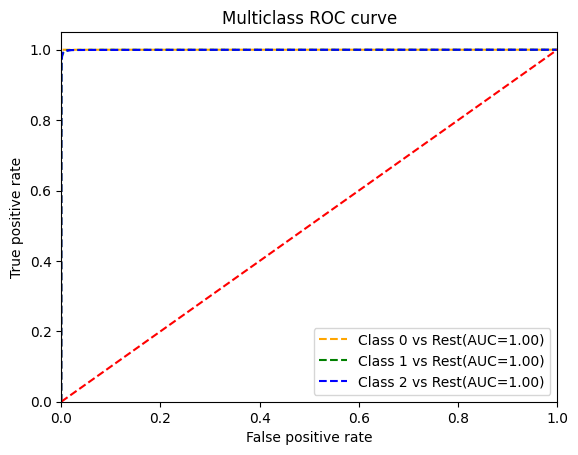

In [ ]:
#plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest(AUC=%0.2f)'%(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest(AUC=%0.2f)'%(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest(AUC=%0.2f)'%(roc_auc[2]))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 'lower right')
plt.show()
